Por favor, carga el archivo CSV de las películas:


Saving dataset_movies.csv to dataset_movies (16).csv


Button(description='Recorrido por niveles', style=ButtonStyle())

Película 'Mission: Impossible II' ha sido insertada en el árbol.


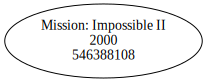

Película 'Meet the Parents' ha sido insertada en el árbol.


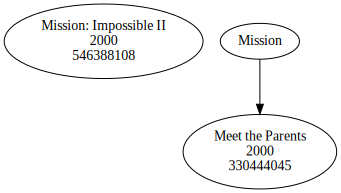

Película 'Scary Movie' ha sido insertada en el árbol.


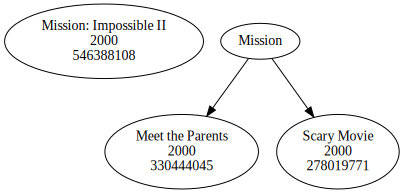

Película 'Vertical Limit' ha sido insertada en el árbol.


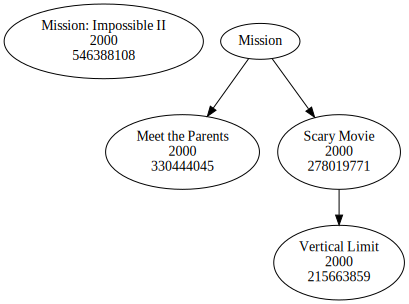

Película 'Erin Brockovich' ha sido insertada en el árbol.


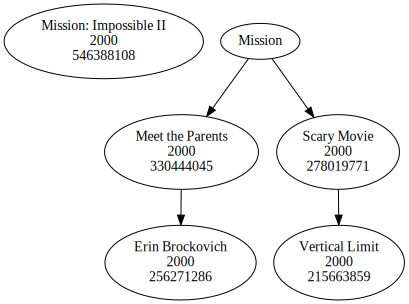

Balance del nodo 'Scary Movie': -1


In [ ]:
import pandas as pd
import graphviz
from google.colab import files
from IPython.display import display
import ipywidgets as widgets

# Clase para representar un nodo del árbol de películas
class NodoPelicula:
    def __init__(self, titulo, año, ingresos_mundiales, ingresos_nacionales, ingresos_internacionales):
        self.titulo = titulo
        self.año = año
        self.ingresos_mundiales = ingresos_mundiales
        self.ingresos_nacionales = ingresos_nacionales
        self.ingresos_internacionales = ingresos_internacionales
        self.porcentaje_nacional = (ingresos_nacionales / ingresos_mundiales) * 100
        self.porcentaje_internacional = (ingresos_internacionales / ingresos_mundiales) * 100
        self.izquierda = None
        self.derecha = None
        self.altura = 1  # Altura inicial del nodo

# Clase para manejar el árbol AVL
class ArbolPeliculasAVL:
    def __init__(self):
        self.raiz = None

    def obtener_altura(self, nodo):
        if nodo is None:
            return 0
        return nodo.altura

    def obtener_balance(self, nodo):
        if nodo is None:
            return 0
        return self.obtener_altura(nodo.izquierda) - self.obtener_altura(nodo.derecha)

    def rotar_derecha(self, y):
        x = y.izquierda
        T2 = x.derecha
        x.derecha = y
        y.izquierda = T2
        y.altura = 1 + max(self.obtener_altura(y.izquierda), self.obtener_altura(y.derecha))
        x.altura = 1 + max(self.obtener_altura(x.izquierda), self.obtener_altura(x.derecha))
        return x

    def rotar_izquierda(self, x):
        y = x.derecha
        T2 = y.izquierda
        y.izquierda = x
        x.derecha = T2
        x.altura = 1 + max(self.obtener_altura(x.izquierda), self.obtener_altura(x.derecha))
        y.altura = 1 + max(self.obtener_altura(y.izquierda), self.obtener_altura(y.derecha))
        return y

    def insertar(self, nodo, titulo, año, ingresos_mundiales, ingresos_nacionales, ingresos_internacionales):
        if nodo is None:
            return NodoPelicula(titulo, año, ingresos_mundiales, ingresos_nacionales, ingresos_internacionales)

        if titulo < nodo.titulo:
            nodo.izquierda = self.insertar(nodo.izquierda, titulo, año, ingresos_mundiales, ingresos_nacionales, ingresos_internacionales)
        elif titulo > nodo.titulo:
            nodo.derecha = self.insertar(nodo.derecha, titulo, año, ingresos_mundiales, ingresos_nacionales, ingresos_internacionales)
        else:
            # Si el título ya existe, no se inserta
            return nodo

        nodo.altura = 1 + max(self.obtener_altura(nodo.izquierda), self.obtener_altura(nodo.derecha))
        balance = self.obtener_balance(nodo)

        # Balancear el árbol AVL
        if balance > 1 and titulo < nodo.izquierda.titulo:
            return self.rotar_derecha(nodo)
        if balance < -1 and titulo > nodo.derecha.titulo:
            return self.rotar_izquierda(nodo)
        if balance > 1 and titulo > nodo.izquierda.titulo:
            nodo.izquierda = self.rotar_izquierda(nodo.izquierda)
            return self.rotar_derecha(nodo)
        if balance < -1 and titulo < nodo.derecha.titulo:
            nodo.derecha = self.rotar_derecha(nodo.derecha)
            return self.rotar_izquierda(nodo)

        return nodo

    def eliminar(self, nodo, titulo):
        if nodo is None:
            return nodo

        if titulo < nodo.titulo:
            nodo.izquierda = self.eliminar(nodo.izquierda, titulo)
        elif titulo > nodo.titulo:
            nodo.derecha = self.eliminar(nodo.derecha, titulo)
        else:
            if nodo.izquierda is None:
                return nodo.derecha
            elif nodo.derecha is None:
                return nodo.izquierda

            min_nodo = self.obtener_minimo(nodo.derecha)
            nodo.titulo = min_nodo.titulo
            nodo.año = min_nodo.año
            nodo.ingresos_mundiales = min_nodo.ingresos_mundiales
            nodo.ingresos_nacionales = min_nodo.ingresos_nacionales
            nodo.ingresos_internacionales = min_nodo.ingresos_internacionales
            nodo.derecha = self.eliminar(nodo.derecha, min_nodo.titulo)

        nodo.altura = 1 + max(self.obtener_altura(nodo.izquierda), self.obtener_altura(nodo.derecha))
        balance = self.obtener_balance(nodo)

        if balance > 1 and self.obtener_balance(nodo.izquierda) >= 0:
            return self.rotar_derecha(nodo)
        if balance > 1 and self.obtener_balance(nodo.izquierda) < 0:
            nodo.izquierda = self.rotar_izquierda(nodo.izquierda)
            return self.rotar_derecha(nodo)
        if balance < -1 and self.obtener_balance(nodo.derecha) <= 0:
            return self.rotar_izquierda(nodo)
        if balance < -1 and self.obtener_balance(nodo.derecha) > 0:
            nodo.derecha = self.rotar_derecha(nodo.derecha)
            return self.rotar_izquierda(nodo)

        return nodo

    def obtener_minimo(self, nodo):
        actual = nodo
        while actual.izquierda is not None:
            actual = actual.izquierda
        return actual

    def buscar(self, nodo, titulo):
        if nodo is None or nodo.titulo == titulo:
            return nodo
        if titulo < nodo.titulo:
            return self.buscar(nodo.izquierda, titulo)
        return self.buscar(nodo.derecha, titulo)

    # Nueva función para buscar por criterios
    def buscar_por_criterios(self, nodo, año, minimo_internacional):
        if nodo is None:
            return []
        resultados = []
        if nodo.año == año and nodo.porcentaje_nacional < nodo.porcentaje_internacional and nodo.ingresos_internacionales >= minimo_internacional:
            resultados.append(nodo.titulo)
        resultados.extend(self.buscar_por_criterios(nodo.izquierda, año, minimo_internacional))
        resultados.extend(self.buscar_por_criterios(nodo.derecha, año, minimo_internacional))
        return resultados

    def visualizar_arbol(self, nodo, dot=None):
        if dot is None:
            dot = graphviz.Digraph()
        if nodo is not None:
            dot.node(nodo.titulo, f'{nodo.titulo}\n{nodo.año}\n{nodo.ingresos_mundiales}')
            if nodo.izquierda:
                dot.edge(nodo.titulo, nodo.izquierda.titulo)
                self.visualizar_arbol(nodo.izquierda, dot)
            if nodo.derecha:
                dot.edge(nodo.titulo, nodo.derecha.titulo)
                self.visualizar_arbol(nodo.derecha, dot)
        return dot

    def recorrido_nivel(self, nodo):
        if nodo is None:
            return
        cola = []
        cola.append(nodo)
        while len(cola) > 0:
            actual = cola.pop(0)
            print(actual.titulo)
            if actual.izquierda:
                cola.append(actual.izquierda)
            if actual.derecha:
                cola.append(actual.derecha)

# Clase para manejar la base de datos de películas
class BaseDatosPeliculas:
    def __init__(self, archivo):
        self.peliculas_df = pd.read_csv(archivo)

    def obtener_datos_pelicula(self, titulo):
        pelicula = self.peliculas_df[self.peliculas_df['Title'] == titulo]
        if not pelicula.empty:
            datos_pelicula = pelicula.iloc[0]
            return {
                'titulo': datos_pelicula['Title'],
                'año': datos_pelicula['Year'],
                'ingresos_mundiales': datos_pelicula['Worldwide Earnings'],
                'ingresos_nacionales': datos_pelicula['Domestic Earnings'],
                'ingresos_internacionales': datos_pelicula['Foreign Earnings']
            }
        return None

# Función para cargar el archivo CSV
def cargar_archivo_csv():
    print("Por favor, carga el archivo CSV de las películas:")
    archivo_subido = files.upload()
    nombre_archivo = next(iter(archivo_subido))
    return BaseDatosPeliculas(nombre_archivo)

# Función para agregar película al árbol
def agregar_pelicula_a_arbol(arbol, base_datos, titulo):
    datos_pelicula = base_datos.obtener_datos_pelicula(titulo)
    if datos_pelicula:
        arbol.raiz = arbol.insertar(
            arbol.raiz,
            datos_pelicula['titulo'],
            datos_pelicula['año'],
            datos_pelicula['ingresos_mundiales'],
            datos_pelicula['ingresos_nacionales'],
            datos_pelicula['ingresos_internacionales']
        )
        print(f"Película '{titulo}' ha sido insertada en el árbol.")
        # Visualizar el árbol después de la inserción
        dot = arbol.visualizar_arbol(arbol.raiz)
        display(dot)
    else:
        print(f"Película '{titulo}' no encontrada en la base de datos.")

# Función para eliminar una película del árbol
def eliminar_pelicula_de_arbol(arbol, titulo):
    if arbol.buscar(arbol.raiz, titulo):
        arbol.raiz = arbol.eliminar(arbol.raiz, titulo)
        print(f"Película '{titulo}' ha sido eliminada del árbol.")
        dot = arbol.visualizar_arbol(arbol.raiz)
        display(dot)
    else:
        print(f"Película '{titulo}' no encontrada en el árbol.")

# Función para buscar una película en el árbol
def buscar_pelicula_en_arbol(arbol, titulo):
    resultado = arbol.buscar(arbol.raiz, titulo)
    if resultado:
        print(f"Película encontrada: {resultado.titulo}, Año: {resultado.año}, Ingresos Mundiales: {resultado.ingresos_mundiales}")
    else:
        print(f"Película '{titulo}' no encontrada en el árbol.")

# Función para buscar películas por criterios (año, ingresos internacionales mínimos)
def buscar_peliculas_por_criterios(arbol, año, minimo_internacional):
    resultados = arbol.buscar_por_criterios(arbol.raiz, año, minimo_internacional)
    if resultados:
        print("Películas que cumplen con los criterios:")
        for resultado in resultados:
            print(resultado)
    else:
        print("No se encontraron películas que cumplan con los criterios.")

# Función para realizar un recorrido por niveles
def recorrido_niveles(arbol):
    print("Recorrido por niveles del árbol:")
    arbol.recorrido_nivel(arbol.raiz)

# Programa principal para interactuar con el usuario
def ejecutar_en_colab():
    # Cargar la base de datos de películas
    base_datos = cargar_archivo_csv()

    # Crear una instancia del árbol AVL
    arbol_peliculas = ArbolPeliculasAVL()

    # Crear widgets para las operaciones
    opciones_peliculas = base_datos.peliculas_df['Title'].tolist()

    # Widgets para insertar película
    selector_insertar = widgets.Dropdown(options=opciones_peliculas, description='Insertar:')
    boton_insertar = widgets.Button(description="Insertar película")
    display(widgets.HBox([selector_insertar, boton_insertar]))

    # Widgets para eliminar película
    selector_eliminar = widgets.Dropdown(options=[], description='Eliminar:')
    boton_eliminar = widgets.Button(description="Eliminar película")
    display(widgets.HBox([selector_eliminar, boton_eliminar]))

    # Widgets para buscar película
    selector_buscar = widgets.Dropdown(options=[], description='Buscar:')
    boton_buscar = widgets.Button(description="Buscar película")
    display(widgets.HBox([selector_buscar, boton_buscar]))

    # Widgets para buscar por criterios
    año_input = widgets.IntText(description="Año", value=2020)
    ingresos_internacionales_input = widgets.IntText(description="Mínimo ingresos internacionales", value=10000000)
    boton_buscar_criterios = widgets.Button(description="Buscar por criterios")
    display(widgets.VBox([año_input, ingresos_internacionales_input, boton_buscar_criterios]))

    # Botón para recorrido por niveles
    boton_recorrido = widgets.Button(description="Recorrido por niveles")
    display(boton_recorrido)

    # Botones adicionales para operaciones en nodos
    selector_nodos = widgets.Dropdown(options=[], description='Seleccionar nodo:')
    boton_nivel = widgets.Button(description="Obtener nivel")
    boton_balance = widgets.Button(description="Obtener balance")
    boton_padre = widgets.Button(description="Obtener padre")
    boton_abuelo = widgets.Button(description="Obtener abuelo")
    boton_tio = widgets.Button(description="Obtener tío")
    display(widgets.VBox([selector_nodos, boton_nivel, boton_balance, boton_padre, boton_abuelo, boton_tio]))

    # Funciones de los botones
    def on_insertar_click(b):
        titulo = selector_insertar.value
        agregar_pelicula_a_arbol(arbol_peliculas, base_datos, titulo)
        actualizar_listas(arbol_peliculas, selector_eliminar, selector_buscar, selector_nodos)

    def on_eliminar_click(b):
        titulo = selector_eliminar.value
        eliminar_pelicula_de_arbol(arbol_peliculas, titulo)
        actualizar_listas(arbol_peliculas, selector_eliminar, selector_buscar, selector_nodos)

    def on_buscar_click(b):
        titulo = selector_buscar.value
        buscar_pelicula_en_arbol(arbol_peliculas, titulo)

    def on_buscar_criterios_click(b):
        año = año_input.value
        minimo_internacional = ingresos_internacionales_input.value
        buscar_peliculas_por_criterios(arbol_peliculas, año, minimo_internacional)

    def on_recorrido_click(b):
        recorrido_niveles(arbol_peliculas)

    # Operaciones con nodos seleccionados
    def on_nivel_click(b):
        titulo = selector_nodos.value
        nivel = arbol_peliculas.obtener_nivel(arbol_peliculas.raiz, titulo)
        print(f"Nivel del nodo '{titulo}': {nivel}")

    def on_balance_click(b):
        titulo = selector_nodos.value
        nodo = arbol_peliculas.buscar(arbol_peliculas.raiz, titulo)
        balance = arbol_peliculas.obtener_balance(nodo)
        print(f"Balance del nodo '{titulo}': {balance}")

    def on_padre_click(b):
        titulo = selector_nodos.value
        padre = arbol_peliculas.obtener_padre(arbol_peliculas.raiz, titulo)
        if padre:
            print(f"Padre del nodo '{titulo}': {padre.titulo}")
        else:
            print(f"El nodo '{titulo}' no tiene padre (es la raíz)")

    def on_abuelo_click(b):
        titulo = selector_nodos.value
        abuelo = arbol_peliculas.obtener_abuelo(arbol_peliculas.raiz, titulo)
        if abuelo:
            print(f"Abuelo del nodo '{titulo}': {abuelo.titulo}")
        else:
            print(f"El nodo '{titulo}' no tiene abuelo")

    def on_tio_click(b):
        titulo = selector_nodos.value
        tio = arbol_peliculas.obtener_tio(arbol_peliculas.raiz, titulo)
        if tio:
            print(f"Tío del nodo '{titulo}': {tio.titulo}")
        else:
            print(f"El nodo '{titulo}' no tiene tío")

    # Conectar botones con funciones
    boton_insertar.on_click(on_insertar_click)
    boton_eliminar.on_click(on_eliminar_click)
    boton_buscar.on_click(on_buscar_click)
    boton_buscar_criterios.on_click(on_buscar_criterios_click)
    boton_recorrido.on_click(on_recorrido_click)
    boton_nivel.on_click(on_nivel_click)
    boton_balance.on_click(on_balance_click)
    boton_padre.on_click(on_padre_click)
    boton_abuelo.on_click(on_abuelo_click)
    boton_tio.on_click(on_tio_click)

    # Función para actualizar las listas de películas en los dropdowns
    def actualizar_listas(arbol, selector_eliminar, selector_buscar, selector_nodos):
        titulos_arbol = obtener_titulos_arbol(arbol.raiz)
        selector_eliminar.options = titulos_arbol
        selector_buscar.options = titulos_arbol
        selector_nodos.options = titulos_arbol

    # Función para obtener los títulos de las películas en el árbol
    def obtener_titulos_arbol(nodo):
        if nodo is None:
            return []
        return obtener_titulos_arbol(nodo.izquierda) + [nodo.titulo] + obtener_titulos_arbol(nodo.derecha)

# Ejecutar el programa en Colab
ejecutar_en_colab()

